In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,roc_curve, auc
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("./initv3.csv")
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,77,23,0,0,67.796610,0.038961,0.9,0.688312,3,0,...,0,0,0,0,0,0,0,0,0,1
1,126,50,0,0,52.272727,0.015873,0.9,0.698413,3,3,...,0,0,0,0,0,0,0,0,0,1
2,32,24,0,9,54.545455,0.062500,0.5,0.750000,2,2,...,0,0,0,0,0,0,0,0,0,1
3,81,27,0,0,73.015873,0.037037,0.9,0.641975,3,1,...,0,0,0,0,0,0,0,0,0,1
4,31,10,0,501,64.516129,0.064516,0.5,0.741935,5,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
df.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'LetterRatioInURL', 'NoOfQMarkInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'label'],
      dtype='object')

In [4]:
keys = ['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'LetterRatioInURL', 'NoOfQMarkInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'label']
a = df.loc[df['URL'] == "https://www.cornerstoneinsurance.ca"][keys]

[float(a[key].iloc[-1]) for key in keys]

KeyError: 'URL'

In [5]:
from Enum import *
df['TLD'] = df['TLD'].apply(lambda x: TLD.index(x))

ValueError: 0 is not in list

In [6]:
# Iterate through each column
for column in df.columns:
    # Get unique values and their counts for the column
    unique_values = df[column].value_counts()

    # Print column name
    print(f"\nUnique values for column '{column}':")

    # Print the unique values table
    print(unique_values)


Unique values for column 'URLLength':
URLLength
29     33
36     30
32     28
28     28
51     27
       ..
167     1
262     1
183     1
266     1
117     1
Name: count, Length: 154, dtype: int64

Unique values for column 'DomainLength':
DomainLength
16     90
15     87
20     82
14     70
17     70
19     59
18     54
13     53
24     52
22     50
21     47
12     44
23     42
25     38
27     33
26     29
50     28
11     28
28     25
10     23
29     21
32     20
30     17
35     12
42     12
6      12
9      11
33     11
36     11
31     10
8      10
37     10
39      9
34      8
38      7
44      7
61      6
7       6
46      5
40      5
48      3
4       3
54      2
179     2
120     2
5       2
59      2
68      2
57      2
47      2
41      2
45      2
63      1
69      1
64      1
213     1
78      1
Name: count, dtype: int64

Unique values for column 'IsDomainIP':
IsDomainIP
0    1225
1      20
Name: count, dtype: int64

Unique values for column 'TLD':
TLD
0      763
3     

In [6]:
columns_to_drop = ['FILENAME', 'URL', 'Domain', 'Title']

for column in columns_to_drop:
    if column in df.columns:
        df = df.drop(columns=[column])

In [7]:
df.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,77,23,0,0,67.796610,0.038961,0.9,0.688312,3,0,...,0,0,0,0,0,0,0,0,0,1
1,126,50,0,0,52.272727,0.015873,0.9,0.698413,3,3,...,0,0,0,0,0,0,0,0,0,1
2,32,24,0,9,54.545455,0.062500,0.5,0.750000,2,2,...,0,0,0,0,0,0,0,0,0,1
3,81,27,0,0,73.015873,0.037037,0.9,0.641975,3,1,...,0,0,0,0,0,0,0,0,0,1
4,31,10,0,501,64.516129,0.064516,0.5,0.741935,5,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df.columns

Index(['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'LetterRatioInURL', 'NoOfQMarkInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
       'label'],
      dtype='object')

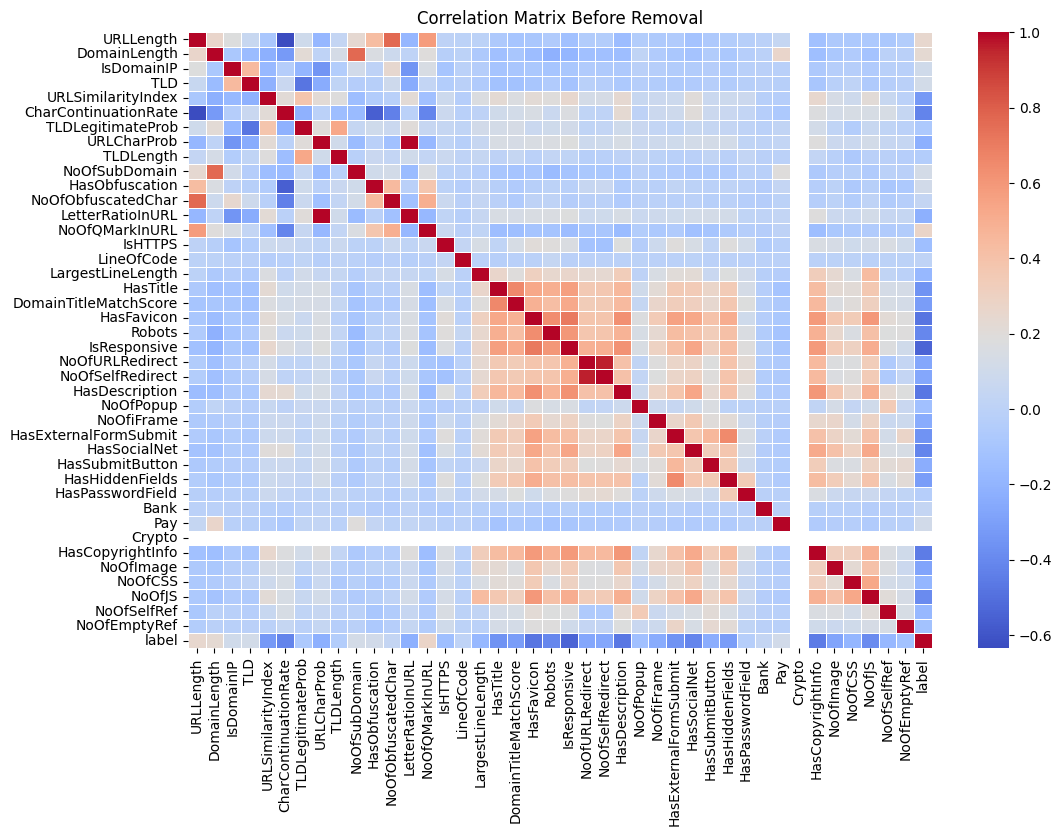

In [9]:
correlation_matrix_before = df.corr('pearson')

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_before, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Before Removal')
plt.savefig('Correlation_Matrix_Before_Removal.png')


In [10]:
# dfd = df[['URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
#        'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
#        'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
#        'LetterRatioInURL', 'NoOfQMarkInURL', 'IsHTTPS', 'LineOfCode',
#        'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'HasFavicon',
#        'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
#        'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
#        'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
#        'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
#        'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef',
#        'label']]

dfd = df

In [11]:
dfd

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
0,77,23,0,0,67.796610,0.038961,0.9,0.688312,3,0,...,0,0,0,0,0,0,0,0,0,1
1,126,50,0,0,52.272727,0.015873,0.9,0.698413,3,3,...,0,0,0,0,0,0,0,0,0,1
2,32,24,0,9,54.545455,0.062500,0.5,0.750000,2,2,...,0,0,0,0,0,0,0,0,0,1
3,81,27,0,0,73.015873,0.037037,0.9,0.641975,3,1,...,0,0,0,0,0,0,0,0,0,1
4,31,10,0,501,64.516129,0.064516,0.5,0.741935,5,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1240,32,21,0,83,68.085106,0.093750,0.5,0.750000,2,1,...,0,0,0,0,0,0,0,0,0,1
1241,25,10,0,161,57.142857,0.080000,0.5,0.760000,2,0,...,0,0,0,0,0,0,0,0,0,1
1242,83,16,0,0,54.054054,0.024096,0.9,0.445783,3,0,...,0,0,0,0,0,0,0,0,0,1
1243,18,11,0,21,56.410256,0.111111,0.5,0.777778,2,0,...,0,0,0,0,2,2,12,0,0,1


In [12]:
dfd.shape

(1245, 42)

In [13]:
dfd.describe()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,label
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,...,1245.000000,1245.000000,1245.0,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1245.00000,1245.000000
mean,63.476305,22.329317,0.016064,24.168675,59.461145,0.055309,0.772088,0.754933,2.797590,1.107631,...,0.008032,0.017671,0.0,0.230522,7.112450,1.999197,7.752610,9.601606,0.08755,0.600803
std,53.031679,13.763008,0.125773,70.454899,8.540554,0.030888,0.180862,0.092673,0.576184,1.068994,...,0.089297,0.131804,0.0,0.421336,26.825329,7.963795,17.966694,65.113297,0.57790,0.489930
min,15.000000,4.000000,0.000000,-1.000000,24.104235,0.004890,0.500000,0.181818,1.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,33.000000,15.000000,0.000000,0.000000,53.333333,0.032609,0.500000,0.720930,3.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,49.000000,20.000000,0.000000,0.000000,59.701493,0.050000,0.900000,0.780000,3.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,74.000000,26.000000,0.000000,13.000000,66.666667,0.071429,0.900000,0.815385,3.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,2.000000,1.000000,8.000000,0.000000,0.00000,1.000000
max,552.000000,213.000000,1.000000,657.000000,83.720930,0.166667,0.900000,0.892857,8.000000,12.000000,...,1.000000,1.000000,0.0,1.000000,536.000000,163.000000,169.000000,1192.000000,8.00000,1.000000


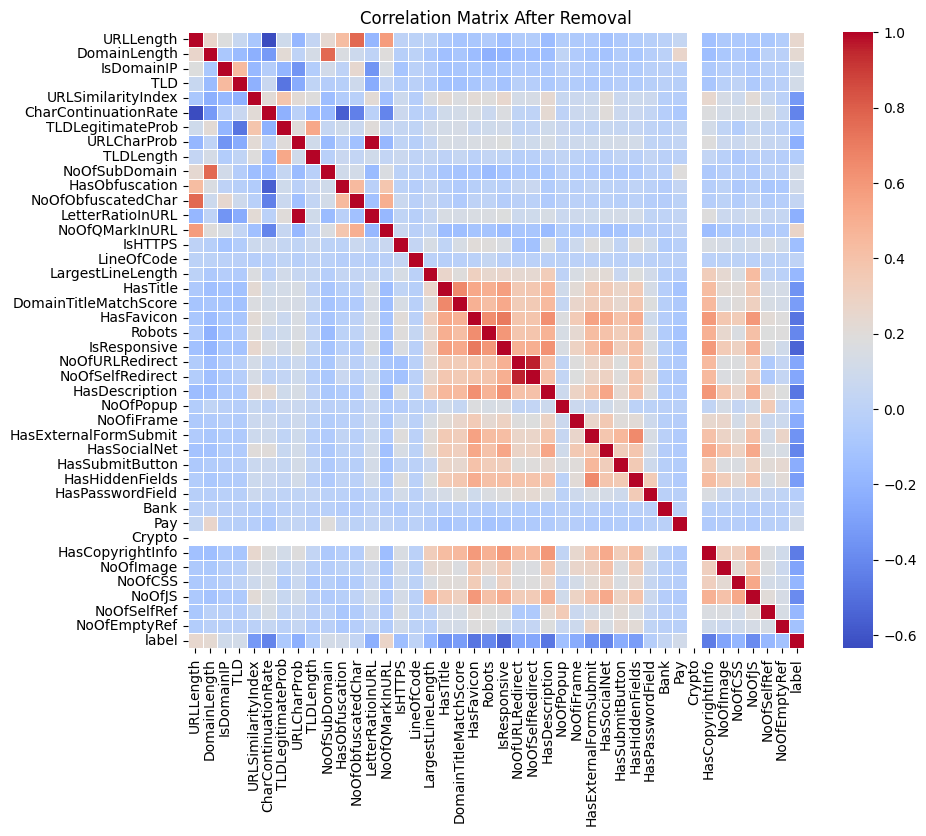

In [14]:
# Calculate the correlation matrix after removing highly correlated features
correlation_matrix_after = dfd.corr()

# Plot the correlation matrix after removal
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_after, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix After Removal')
plt.savefig('Correlation Matrix After Removal.png')
plt.imshow(plt.imread('Correlation Matrix After Removal.png'))

In [15]:
X = dfd.drop(columns=['label'])
y = dfd['label']

In [16]:
X.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,HasPasswordField,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef
0,77,23,0,0,67.796610,0.038961,0.9,0.688312,3,0,...,0,0,0,0,0,0,0,0,0,0
1,126,50,0,0,52.272727,0.015873,0.9,0.698413,3,3,...,0,0,0,0,0,0,0,0,0,0
2,32,24,0,9,54.545455,0.062500,0.5,0.750000,2,2,...,0,0,0,0,0,0,0,0,0,0
3,81,27,0,0,73.015873,0.037037,0.9,0.641975,3,1,...,0,0,0,0,0,0,0,0,0,0
4,31,10,0,501,64.516129,0.064516,0.5,0.741935,5,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

gbc = RandomForestClassifier(n_estimators=80, random_state=42)
gbc.fit(X_train,y_train)

y_pred = gbc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8875502008032129


In [21]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       107
           1       0.88      0.94      0.90       142

    accuracy                           0.89       249
   macro avg       0.89      0.88      0.88       249
weighted avg       0.89      0.89      0.89       249



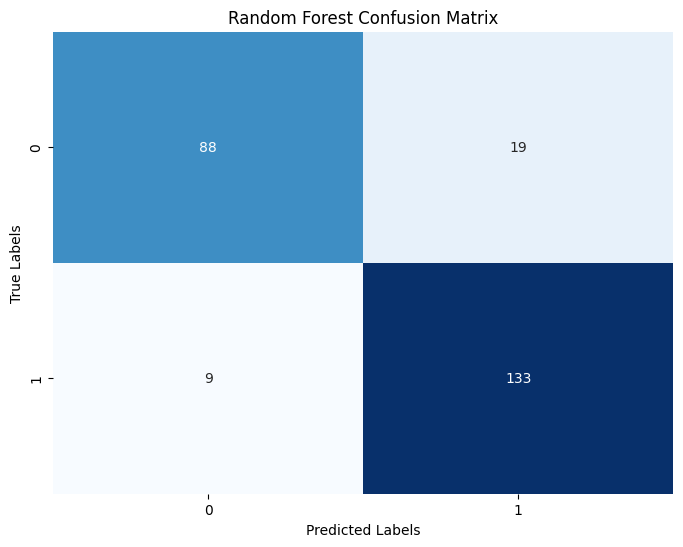

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [23]:
import pickle

with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(gbc, f)

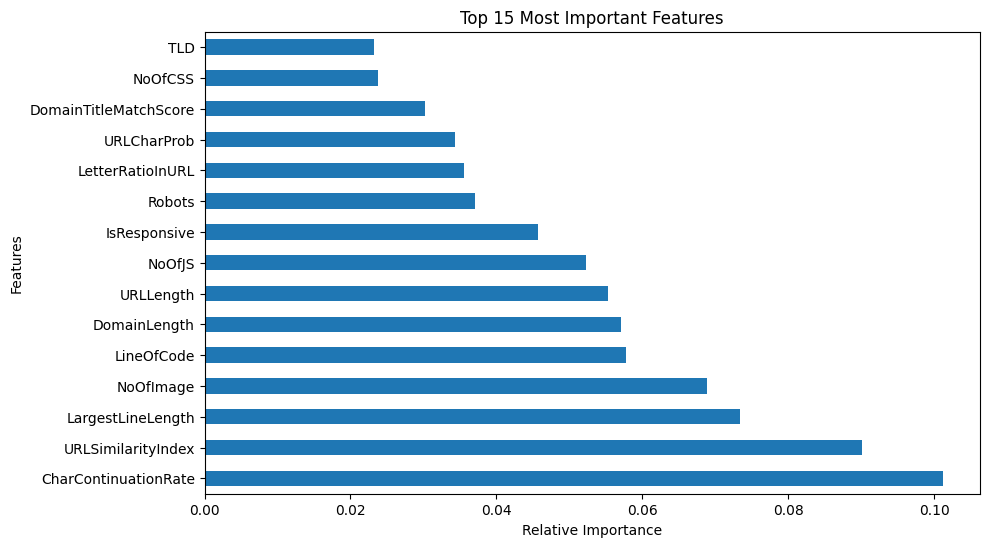

In [ ]:
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(gbc.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title('Top 15 Most Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [46]:
from url_feature_extraction import PhishingFeatureExtractor

def predict_link(link):
    extractor = PhishingFeatureExtractor()
    feature = extractor.extract_features(link)
    keys = [
        'URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'LetterRatioInURL', 'NoOfQMarkInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef'
    ]

    vals = [feature[key] for key in keys]
    pred = gbc.predict([vals])
    print(pred)

In [48]:
import json

with open("verified_online.json", 'r') as f:
    openphish = json.load(f)

# for p in openphish[:5]:
#     predict_link(p['url'])

for p in openphish[:5]:
    print(p['url'])

https://locker-reprogrammation.com/
https://locker-reprogrammation.com/pac/calcul.php
http://guiadabotlane.com.br/wp-content/plugins/wp-cybernetic-information/index.php?r=bD1odHRwczovL2RxcmRidi5jb20v
https://chaindex.netlify.app
https://13-58-50-242.cprapid.com/app/update.php?xo5cpll3obsib5oslk40


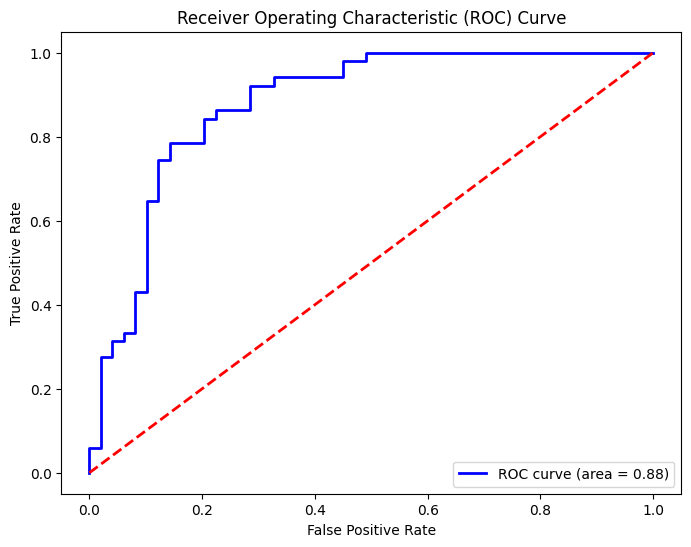

In [22]:
probs = gbc.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("\n--Training data samples--")
print(X_train.shape)


--Training data samples--
(373, 41)


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler_obj = MinMaxScaler()
X_train_scaled = scaler_obj.fit_transform(X_train.values)
X_test_scaled = scaler_obj.transform(X_test.values)

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, initializers

input_dim = X_train_scaled.shape[1]
hidden_layer1 = 150
hidden_layer2 = 50
output_dim = 1

model_keras = keras.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(hidden_layer1, activation='relu'),# kernel_initializer=initializers.HeNormal()),
    layers.BatchNormalization(),
    layers.Dense(hidden_layer2, activation='relu'),# kernel_initializer=initializers.HeNormal()),
    layers.BatchNormalization(),
    layers.Dropout(0.1),
    layers.Dense(output_dim, activation='sigmoid')
])

model_keras.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_keras.summary()

2025-05-24 07:02:28.997430: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-24 07:02:29.006151: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748050349.015902    4175 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748050349.018894    4175 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748050349.026238    4175 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 150)            │         6,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150)            │           600 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         7,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50)             │           200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,701 (57.43 KB)

 Trainable params: 14,301 (55.86 KB)

 Non-trainable params: 400 (1.56 KB)

In [34]:
history = model_keras.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10


I0000 00:00:1748050352.321068   15287 service.cc:152] XLA service 0x7f701000c960 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748050352.321084   15287 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2025-05-24 07:02:32.349047: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1748050352.536137   15287 cuda_dnn.cc:529] Loaded cuDNN version 90701


1/5 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.3906 - loss: 0.9209

I0000 00:00:1748050353.125652   15287 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - accuracy: 0.5478 - loss: 0.7598 - val_accuracy: 0.6533 - val_loss: 0.6457
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7851 - loss: 0.4488 - val_accuracy: 0.6667 - val_loss: 0.6307
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8287 - loss: 0.3800 - val_accuracy: 0.6267 - val_loss: 0.6251
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8515 - loss: 0.3388 - val_accuracy: 0.6400 - val_loss: 0.6231
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8825 - loss: 0.2939 - val_accuracy: 0.6667 - val_loss: 0.6211
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8822 - loss: 0.2875 - val_accuracy: 0.6400 - val_loss: 0.6188
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9055 - loss: 0.2490 - val_accuracy: 0.6533 - val_loss: 0.6161
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9335 - loss: 0.2192 - val_accuracy: 0.6400 - val_loss: 0.6146
Epoch 9/10

In [35]:
test_loss, test_acc = model_keras.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6450 - loss: 0.6136
Test Accuracy: 0.6880


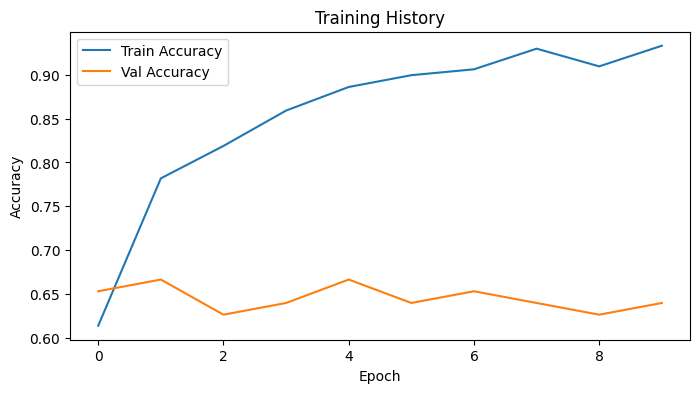

In [36]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training History')
plt.show()

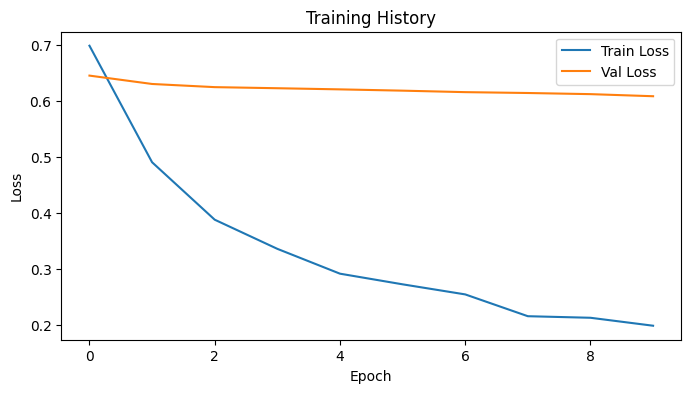

In [37]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training History')
plt.show()

In [38]:
y_pred_prob = model_keras.predict(X_test_scaled)
y_pred_class = (y_pred_prob > 0.5).astype(int).flatten()

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Confusion Matrix:
 [[61  3]
 [36 25]]
              precision    recall  f1-score   support

           0       0.63      0.95      0.76        64
           1       0.89      0.41      0.56        61

    accuracy                           0.69       125
   macro avg       0.76      0.68      0.66       125
weighted avg       0.76      0.69      0.66       125



In [ ]:
from url_feature_extraction import PhishingFeatureExtractor

def predict_link(link):
    extractor = PhishingFeatureExtractor()
    feature = extractor.extract_features(link)
    keys = [
        'URLLength', 'DomainLength', 'IsDomainIP', 'TLD', 'URLSimilarityIndex',
       'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength',
       'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar',
       'LetterRatioInURL', 'NoOfQMarkInURL', 'IsHTTPS', 'LineOfCode',
       'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'HasFavicon',
       'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect',
       'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit',
       'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields',
       'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo',
       'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef'
    ]

    vals = [feature[key] for key in keys]
    print(vals)
    ft = scaler_obj.transform([vals])

    pred = model_keras.predict(ft)
    if pred[0][0] > 0.5:
        print("phishing")
    else:
        print("legit")

In [ ]:
predict_link("https://vanilla-bottles-email-antenna.trycloudflare.com")

In [ ]:
predict_link("https://github.com")